#  Istogrammi e sogliature

In [498]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage import draw as drw
from skimage import  exposure, img_as_float, img_as_ubyte 
from skimage import data, io, color
%matplotlib inline

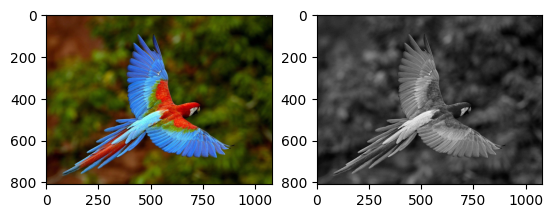

In [499]:
#Carico l'immagine e la visualizzo a colori. La converto, e visualizzo in scala di grigi

astro = io.imread('FESI/istogrammi/istogrammi/images/parrot_small.jpg')#data.astronaut() 
g_astro = img_as_ubyte(color.rgb2gray(astro))

plt.subplot(1,2,1)
plt.imshow(astro)

plt.subplot(1,2,2)
plt.imshow(g_astro,cmap='gray');

### Istogrammi

Una rappresentazione alternativa dell'immagine che mette in evidenza la distribuzione delle intensità perdendo informazione spaziale. <br> 

A partire dalla stessa immagine si possono costruire istogrammi diversi, cambiando il numero di bin (elementi dell'istogramma) o scegliendo di normalizzare l'istogramma (in questo modo lo possiamo trattare come una stima di probabilità).  

**For more info**: check the documentation of  `plt.hist` (from `matplotlib`)

Possiamo analizzare l'istogramma ottenuto per scegliere un'opportuna soglia da applicare all'immagine ad intensità luminosa per binarizzarla.

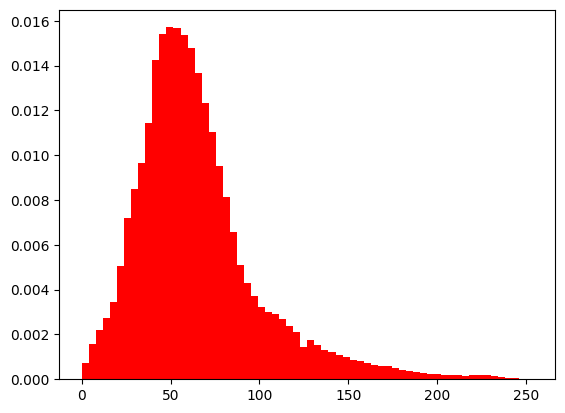

In [500]:
#visualizzo l'istogramma per analizzare i vari valori di grigi nell'immagine. L'istogramma è una rappresentazione grafica che mostra la distribuzione 
#dei livelli di intensità (pixel) presenti nell'immagine. In altre parole, ci dice quanti pixel hanno un valore di intensità compreso tra 0 (nero) e 255
#i bin sono gli intervalli, maggiore è il numero di bin maggiori saranno i miei intervalli --> avrò quindi più intervalli di dimensione minore

#density controls normalization (try out density False)
#bins the number of bins
plt.hist(g_astro.ravel(), bins=64, density=True, color='r'); #con density = true normalizzo l'istogramma in modo tale che l'area sotto la curva sia uguale a 1. 

#Cosa sappiamo su questa immagine?
# Abbiamo molte più aree scure che chiare --> gamma dinamica bassa
# Di conseguenza ho anche un contrasto ridotto
# Inoltre siccome il nostro istogramma ha un picco molto pronunciato, e non una forma a campana, possiamo affermare che le varie intesità di pixel grigi non sono distribuiti uniformemente(valori più frequenti)


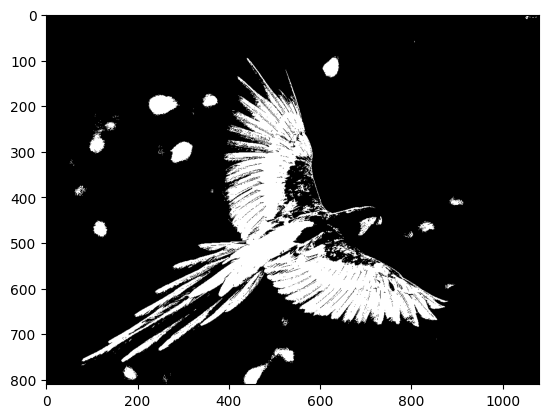

In [501]:
#imposto una maschera di bit per filtrare solo alcuni dettagli dell'immagine. (Con cmap = gray sto specificando che l'immagine viene visualizzata usando una scala di grigi)
plt.imshow(g_astro>100,cmap='gray') #con g_astro > 100 faccio si che vengano presi solo i pixel con valore maggiore di 100

#Prendiamo quindi tutto ciò che è più luminoso del valore prefissato (imposto a 1 (vero) i pixel > 100  e a 0 (falso) i pixel < 100)
#giocando un po' con questo valore possiamo notare come i valori più luminosi siano quelli meno frequenti

Diamo un'occhiata agli istogrammi dei campi di colore e estendiamo la sogliatura a (combinazioni di) campi di colore

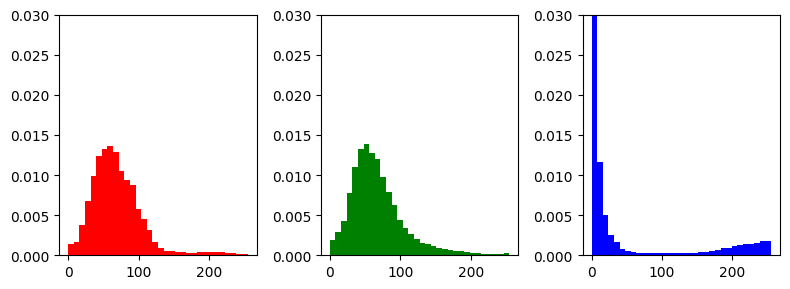

In [502]:
#analizzo tramite vari istrogrammi la distribuzione dei colori r g b.
#Quindi -->  quanti pixel hanno un valore di intensità compreso in un determinato intervallo per ogni colore.

#Isolo i vari canali dell'immagine astro --> prendo tutti gli elementi del canale 0 --> array dei valori rossi e così via
R = astro[:,:,0]
G = astro[:,:,1]
B = astro[:,:,2]

plt.figure(figsize=(8,3))

plt.subplot(1,3,1)
plt.hist(R.ravel(), bins=32, density=True, color='r'); #density controls normalization (try out density False)
plt.ylim([0,0.03])


plt.subplot(1,3,2)
plt.hist(G.ravel(), bins=32, density=True, color='g');
plt.ylim([0,0.03])

plt.subplot(1,3,3)
plt.ylim([0,0.03])
plt.hist(B.ravel(), bins=32, density=True, color='b');

plt.tight_layout() # a handy command that increases spacing between subplots

#Possiamo quindi notare che Gli istogrammi del rosso e del verde presentano una forma simile, con un picco centrale ben definito. 
#Questo suggerisce che i valori di intensità di questi due colori sono distribuiti in modo relativamente uniforme nell'immagine, indicando un buon bilanciamento tra le tonalità 
#rosse e verdi. Mentre il blu presenta numerosi picchi. Questo indica che il colore blu è presente in diverse tonalità nell'immagine e che potrebbe 
#esserci una maggiore variabilità nei valori di intensità del blu rispetto al rosso e al verde.

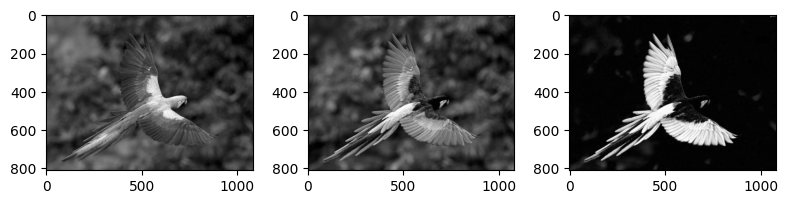

In [503]:
#Visualizzo separatamente i canali rosso verde e blu, ma in tonalità di grigio differenti.
#Come possiamo notare dalle immagini, la nostra teoria precedente viene confermata: infatti le due immagini contenenti le scale di rosso e di verde hanno intensità molto simili,
#invece il grafico raffigurante il blu è contiene intensità totalmente differenti. Inoltre vi è una prevalenza di elementi scuri, come viene confermato anche dall'istogramma (picco sui valori vicini a 0). 

plt.figure(figsize=(8,3))

plt.subplot(1,3,1)
plt.imshow(R,cmap="gray")


plt.subplot(1,3,2)
plt.imshow(G,cmap="gray")

plt.subplot(1,3,3)
plt.imshow(B,cmap="gray")

plt.tight_layout() # a handy command that increases spacing between subplots

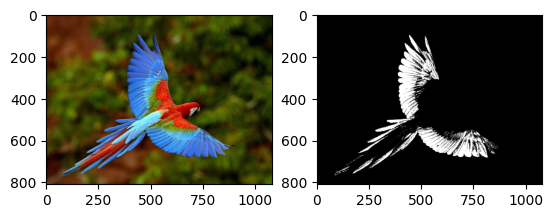

In [504]:
#Viene creata una maschera binaria su un'immagine, basandosi sui valori dei vari canali.

mask = np.multiply((R < 80),(B>100)) #faccio passare solo gli elementi dove il Blu è > 100 (più chiaro) e il Rosso è < 80. Ciò corrisponde all'immagine originale --> gli elementi con valore blu più luminosi sono alcune parti del corpo, quindi ha senso che vengano filtrate solo quelle, soprattuto se aggiungo anche le parti con tonalità di rosso più scure (rimuovo sicuramente la testa e parti della coda che contengono un rosso molto chiaro)
#mask = B<40
plt.subplot(1,2,1)
plt.imshow(astro)

plt.subplot(1,2,2)
plt.imshow(mask, cmap='gray');

Quali sono le relazioni tra campi diversi? come osservarle?

Text(0, 0.5, 'G')

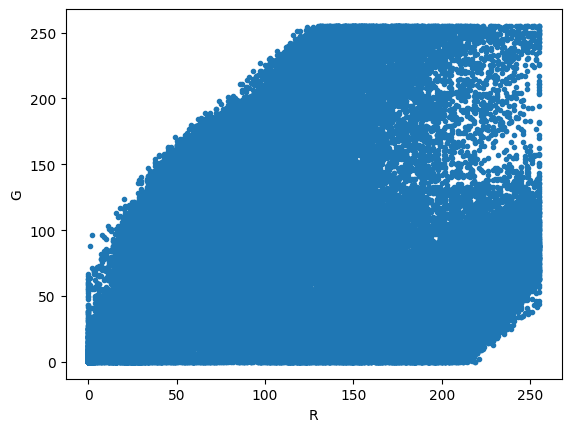

In [505]:
# ogni punto rappresenta la coppia (R,G) dei pixel dell'immagine. Prendo quindi le due matrici e li appiattisco in vettori
plt.plot(R.ravel(),G.ravel(),'.')
plt.xlabel('R') #asse x --> valori del canale rosso
plt.ylabel('G') #asse y --> valori del canale verde

#In questo grafico vado quindi ad analizzare la distribuzione dei colori nell'immagine, considerando solo i canali rosso e verde.
#Le zone del grafico con una maggiore densità di punti indicano che ci sono molti pixel nell'immagine con combinazioni di valori rosso e verde simili.
#il grafico permette di visualizzare rapidamente la distribuzione dei colori nell'immagine e di identificare eventuali dominanti o carenze cromatiche.
#Se la nuvola di punti è allungata lungo una diagonale, significa che i valori di rosso e verde sono fortemente correlati, ovvero che le variazioni di un canale tendono a corrispondere a variazioni simili nell'altro canale. Se invece la nuvola è più dispersa, significa che i canali sono meno correlati.

#Se infatti al posto del canale verde uso il canale blu, possiamo notare come siano molto più dispersi i valori, di conseguenza il valore di un canale non ha una dipendenza dal valore di un altro --> colori slegati, e non ho predominanza di alcune tonalità

#NON PER FORZA NEGATIVO --> Una dispersione elevata può indicare un'immagine ricca di dettagli e sfumature, con transizioni graduali tra i colori.

La funzione qui di seguito (per immagini a intensità luminosa) ci permette di visualizzare immagine, istogramma, cumulativa  

In [506]:
def plot_img_and_hist(img, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram."""
    #img = img_as_float(img) ##Convert our input greyscale image to float 
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(img, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(img.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 255)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(img, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])
   
    return ax_img, ax_hist, ax_cdf



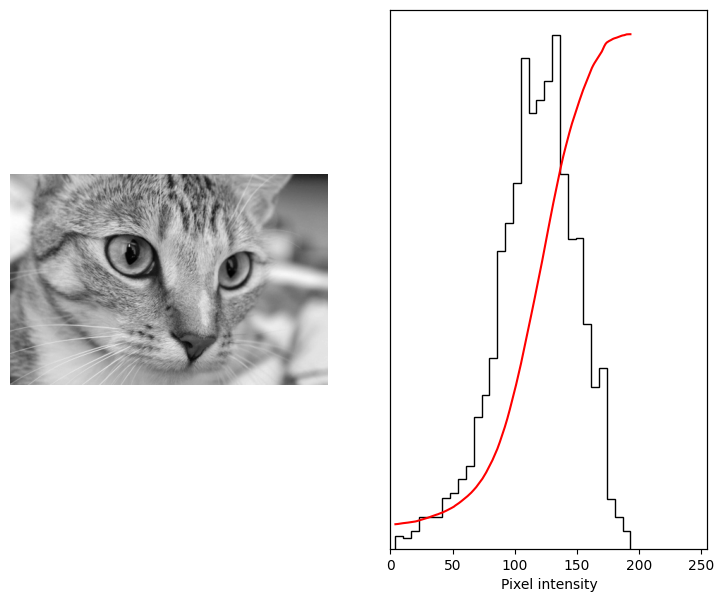

In [507]:
# Test the function plot_img_and_hist using a sample image
img = data.chelsea()
img = img_as_ubyte(color.rgb2gray(img))

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(7)
fig.set_figwidth(9)
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes,30) 

Com'è evidente l'immagine ha una prevalenza di colori chiari e ciò viene mostrato nell'istogramma. La CDF (linea rossa) indica, per ogni livello di intensità, la proporzione di pixel nell'immagine che hanno un valore di intensità inferiore o uguale a quel livello.


### Contrast stretching  


In [508]:
#Questa tecnica serve ad aumentare la visibilità dei dettagli in un'immagine, espandendo la gamma dinamica dei livelli di grigio (variazioni tra chiaro e scuro).

def my_contrast_stretch(img):   #definisco una funzione che prende in input un'immagine e restituisce l'immagine con contrasto aumentato
    M=np.max(img)
    m=np.min(img)
    return np.multiply(np.divide((img-m),(M-m)),255).astype(np.uint8)

Confronto con la funzione skimage (più generica)

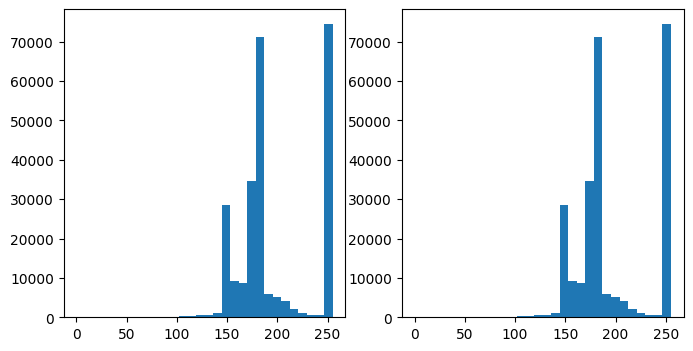

In [ ]:
#Usato principalmente per notare la differenza tra un immagine con un buon contrasto e una con un contrasto basso. 
#Testiamo la nostra funzione per contrast stretching, vedi dopo per risultati più accurati

# un'immagine a contrasto basso ma dove il range dei valori possibili e' quasi completamente usato
rgb_img = data.logo() 
img = img_as_ubyte(color.rgb2gray(rgb_img[:,:,0:3]))

# un'immagine con un buon contrasto
#rgb_img = io.imread('FESI/istogrammi/istogrammi/images/lionfish.jpg') #data.astronaut() 
#img = img_as_ubyte(color.rgb2gray(rgb_img))

my_img_rescale = my_contrast_stretch(img);


fig = plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.hist((img).ravel(), bins=30); # color='black' , histtype='step' );
plt.subplot(1,2,2)
plt.hist((my_img_rescale).ravel(), bins=30); # color='black' , histtype='step' );

(funzione di libreria) Nella versione di `skimage` possiamo controllare il range di input che vogliamo espandere. Qui usiamo i percentili e questo puo' essere comodo soprattutto quando il range dei valori dell'immagine di input è molto ampio  

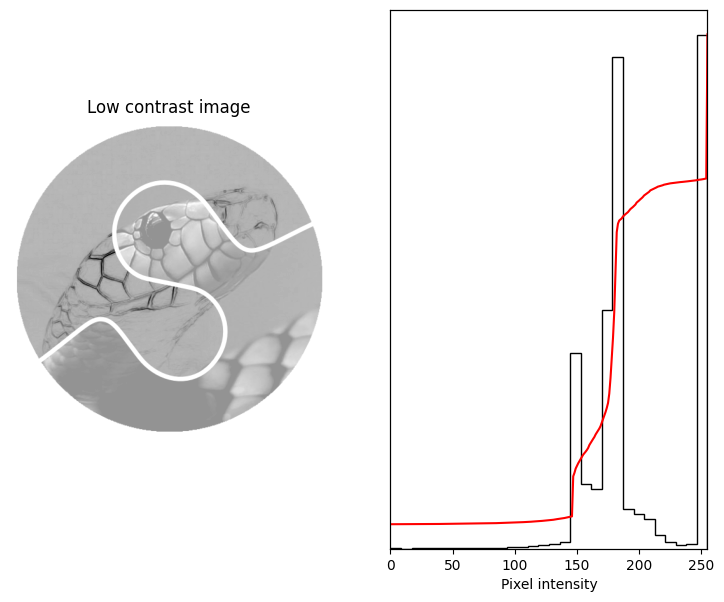

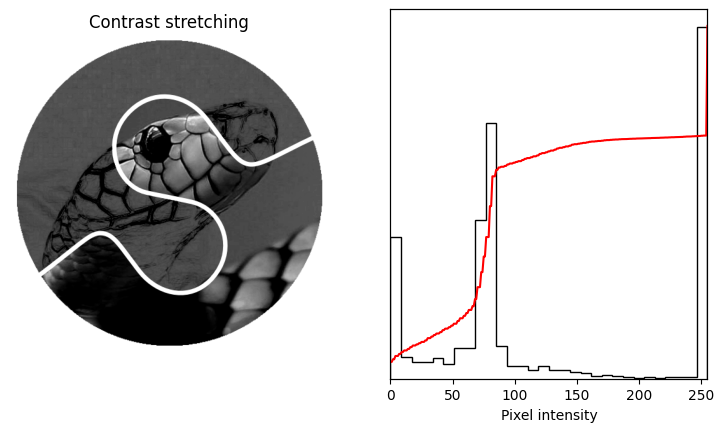

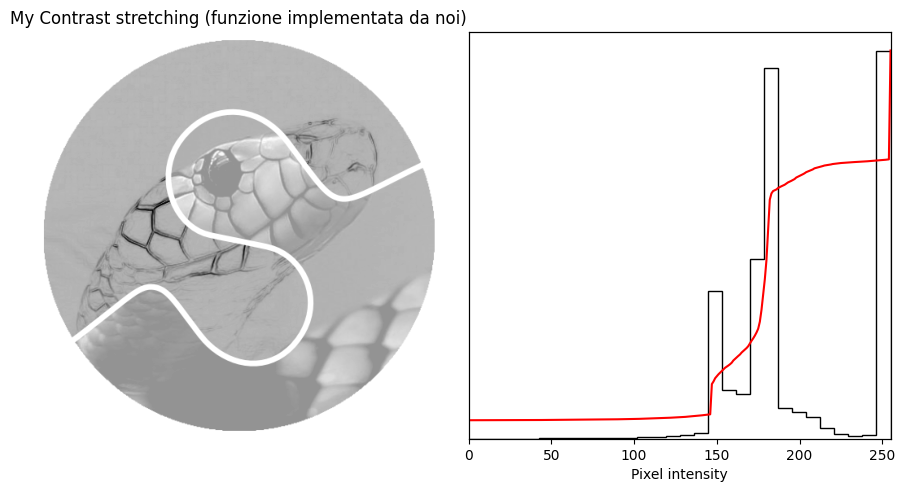

In [510]:
# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
my_img_rescale = my_contrast_stretch(img);

# Display results

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(7)
fig.set_figwidth(9)
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes,30) 
ax_img.set_title('Low contrast image')

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(9)
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes,30)
ax_img.set_title('Contrast stretching')

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(9)
ax_img, ax_hist, ax_cdf = plot_img_and_hist(my_img_rescale, axes,30)
ax_img.set_title('My Contrast stretching (funzione implementata da noi)')

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

## Wrap up
- cosa è un istogramma di un'immagine ad intensità luminosa o a colori
- cosa cambia se cambio il numero di bin e se normalizzo o non normalizzo l'istogramma?
- cosa e' il "contrast stretch"? come si calcola?
- perche' la nostra funzione di stretch del contrasto funziona in modo diverso (e nell'esempio meno bene) di quella di libreria? 